In [1]:
from typing import Dict, List, Tuple
import torch
import numpy as np
import gym
from plotly.subplots import make_subplots
from agent.DQN_Agent import DQNAgent
from environment.DiscreteEnvironment import DiscreteSimpleEnvironment

import pandas as pd

%load_ext autoreload
%autoreload 2

## Set environment and agent parameters

In [2]:
env = DiscreteSimpleEnvironment(param_list=['Tair', 'RH', 'Tmrt', 'Tout', 'Qheat', 'Occ'],
alpha=1,
beta=1,
min_temp=16,
max_temp=21,
discrete_action_dim=100,
modelname='CELLS_v1.fmu',
simulation_path=r'C:\Users\hbenoit\Desktop\DIET_Controller\EnergyPlus_simulations\simple_simulation',
days=151,
hours=24,
minutes=60,
seconds=60,
ep_timestep=6)

agent_arguments = {
"memory_size": [1000,2000],
"batch_size": [64,128],
"actor_update":[4],
"target_update": [100],
"epsilon_decay": [1 / 20000],
"max_epsilon": [1],
"min_epsilon":  [0.0],
"lr":[1e-3],
"gamma": [0.99],
"inside_dim": [128,256],
"num_hidden_layers": [10,12,14],
"seed": [800]
}

agent_arguments = {
"memory_size": [1000],
"batch_size": [64],
"actor_update":[4],
"target_update": [100],
"epsilon_decay": [1 / 20000],
"max_epsilon": [1],
"min_epsilon":  [0.0],
"lr":[1e-3],
"gamma": [0.99],
"inside_dim": [128],
"num_hidden_layers": [2],
"seed": [800]
}


In [4]:
results_path

'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation/DQN_Agent/results/2022_6_15/results_2022_6_15_9_41'

WE TRAIN
Iteration0
Iteration1000
Iteration2000


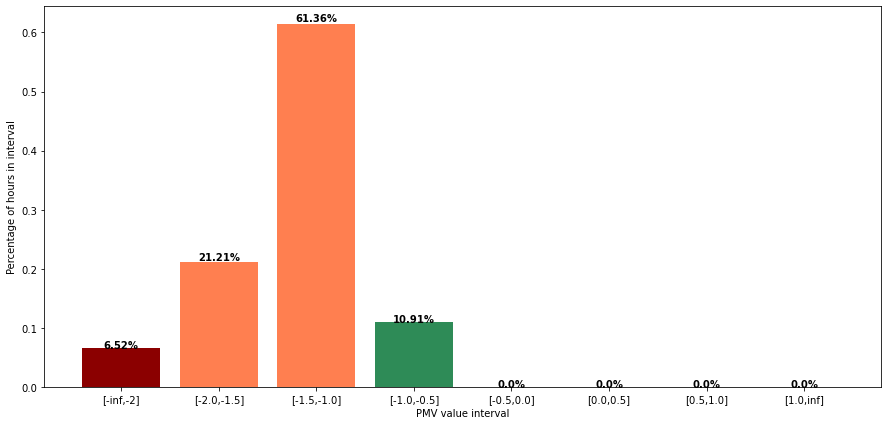

In [3]:
from Performance import all_combinations_list
from Performance import search_similar

logging_path = r"C:\Users\hbenoit\Desktop\DIET_Controller\logs\simple_simulation"

for curr_agent_arguments in all_combinations_list(agent_arguments):

    searching_directory = r"C:\Users\hbenoit\Desktop\DIET_Controller\logs\simple_simulation\results\DQN_Agent"
    agent = DQNAgent(env).from_dict(dict_arguments=curr_agent_arguments)
    log_dict = {**agent.log_dict(), **env.log_dict()}
    num_episodes =1
    log_dict["num_episodes"] = num_episodes

    if(not(search_similar(searching_directory, log_dict))):
        print("WE TRAIN")
        results_path, summary_df = agent.train(logging_path= logging_path, num_episodes=num_episodes, num_iterations=2100 ,log=True)
  

In [14]:
import Performance

Performance.open_json_params('C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_7_46')

{'is_test': False,
 'memory_size': 2000,
 'batch_size': 64,
 'target_update': 100,
 'actor_update': 4,
 'epsilon_decay': 5e-05,
 'max_epsilon': 1,
 'min_epsilon': 0.0,
 'lr': 0.001,
 'gamma': 0.99,
 'inside_dim': 256,
 'num_hidden_layers': 12,
 'seed': 800,
 'param_list': ['Tair', 'RH', 'Tmrt', 'Tout', 'Qheat', 'Occ'],
 'observation_dim': 6,
 'action_dim': 1,
 'min_temp': 16,
 'max_temp': 21,
 'alpha': 1,
 'beta': 1,
 'modelname': 'CELLS_v1.fmu',
 'days': 151,
 'hours': 24,
 'minutes': 60,
 'seconds': 60,
 'ep_timestep': 6,
 'discrete_action_dim': 100,
 'num_episodes': 10,
 'num_iterations': 21744,
 'final_reward': 242275.87176397615,
 'final_cumulative_heating': 11472257911.653708,
 'pmvs': {'[-inf,-2]': 0.10946008094186901,
  '[-2.0,-1.5]': 0.1803991905813098,
  '[-1.5,-1.0]': 0.18393119941133187,
  '[-1.0,-0.5]': 0.28969830757910225,
  '[-0.5,0.0]': 0.13544426048565122,
  '[0.0,0.5]': 0.06733351729212657,
  '[0.5,1.0]': 0.03103384841795438,
  '[1.0,inf]': 0.0026995952906548933}}

In [12]:
# Example of how to use the function: 
import Performance

searching_directory = r"C:\Users\hbenoit\Desktop\DIET_Controller\logs\simple_simulation\DQN_Agent"

conditions={
    "is_test":["=",False],
    "num_iterations": ["=",21744], # to only have have trainings where the full simulation was used
    #"num_episodes":["=",3],
    "alpha":["=",1],
    "beta":["=",1],
    "num_hidden_layers":[">",2],

}

conditions = {"seed":["=",800],    "alpha":["=",1],
    "beta":["=",1], "num_episodes":["=",10]}

path_list = Performance.search_paths(searching_directory,conditions=conditions, top_k=10, utility_function=Performance.cumulative_reward,normalized=True)

path_list

['C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_5_43',
 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_7_46',
 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_7_54',
 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_6_6',
 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_7_39',
 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_6_14',
 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_6_15\\results_2022_6_15_7_31',
 'C:\\Users\\hbenoit\\Desktop\\DIET_Controller\\logs\\simple_simulation\\DQN_Agent\\results\\2022_

In [ ]:
path_list

## Modify jsons

In [ ]:
from pathlib import Path
import json

searching_directory = r"C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller\results\DQN_Agent"

for path in Path(searching_directory).glob("**/*json"):
        
        if os.path.getsize(path) > 0 and str(path).__contains__("env_params"):
                f = open(path,"r")
                log_dict = json.load(f)
                closed= False
                if not("discrete_action_dim" in log_dict.keys()) or (log_dict["action_dim"] != 1):
                    print(path)
                    closed=True
                    log_dict["discrete_action_dim"] = log_dict["action_dim"]
                    log_dict["action_dim"] = 1
                    f.close()

                    os.remove(path)
                    with open(path, 'w') as f:
                        f.write(json.dumps(log_dict,indent=True))

                if not(closed):
                    f.close()


# Testing performance pipeline

In [ ]:
import Performance

env = DiscreteSimpleEnvironment(param_list=['Tair', 'RH', 'Tmrt', 'Tout', 'Qheat', 'Occ'],
alpha=1,
beta=1,
min_temp=16,
max_temp=21,
discrete_action_dim=100,
modelname='CELLS_v1.fmu',
simulation_path=r'C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller\EnergyPlus_simulations\simple_simulation',
days=151,
hours=24,
minutes=60,
seconds=60,
ep_timestep=6)

agent_arguments = {
"memory_size": [1000],
"batch_size": [32],
"target_update": [100],
"epsilon_decay": [1 / 20000],
"max_epsilon": [1],
"min_epsilon":  [0.0],
"gamma": [0.99],
"inside_dim": [128],
"num_hidden_layers": [1],
"seed": [778]
}


parameter = ("seed", [775,776])

logging_path = r"C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller\logs\simple_simulation"

utility_function = Performance.cumulative_reward

agent = DQNAgent(env=env)
num_episodes = 1
num_iterations = env.numsteps
agent_name = "DQN_Agent"

dispersion,risk, results_dict = Performance.across_runs(agent=agent, agent_arguments=agent_arguments, parameter=parameter,
    logging_path=logging_path, num_episodes=num_episodes, num_iterations=num_iterations, utility_function=utility_function,alpha=0.05)

logger = SimpleLogger(
        logging_path=logging_path,
        agent_name="DQN_Agent",
        num_episodes=num_episodes,
        num_iterations=num_iterations,
    )

logger.log_performance_pipeline(results_dict)


